In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("dataset/HomicideReports19802014/database.csv")
df.head()

Record ID Agency Code Agency Name       Agency Type       City   State  \
0          1     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
1          2     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
2          3     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
3          4     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
4          5     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   

   Year    Month  Incident              Crime Type  ... Victim Ethnicity  \
0  1980  January         1  Murder or Manslaughter  ...          Unknown   
1  1980    March         1  Murder or Manslaughter  ...          Unknown   
2  1980    March         2  Murder or Manslaughter  ...          Unknown   
3  1980    April         1  Murder or Manslaughter  ...          Unknown   
4  1980    April         2  Murder or Manslaughter  ...          Unknown   

  Perpetrator Sex  Perpetrator Age               Perpetrator Race  \
0            Male               15  Native American/Alaska Native   
1            Male               42                          White   
2         Unknown                0                        Unknown   
3            Male               42                          White   
4         Unknown                0                        Unknown   

  Perpetrator Ethnicity  Relationship         Weapon Victim Count  \
0               Unknown  Acquaintance   Blunt Object            0   
1               Unknown  Acquaintance  Strangulation            0   
2               Unknown       Unknown        Unknown            0   
3               Unknown  Acquaintance  Strangulation            0   
4               Unknown       Unknown        Unknown            0   

  Perpetrator Count Record Source  
0                 0           FBI  
1                 0           FBI  
2                 0           FBI  
3                 0           FBI  
4                 1           FBI  

[5 rows x 24 columns]

In [6]:
df.shape

(638454, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [8]:
df.isna().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [9]:
df.columns = df.columns.str.replace('\s+', '_') 
print('Year with most cases of homicide is: ', df['Year'].value_counts().idxmax())
print('Month with most cases of homicide is: ', df['Month'].value_counts().idxmax())
print('City with most cases of homicide is: ', df['City'].value_counts().idxmax())
print('State with most cases of homicide is: ', df['State'].value_counts().idxmax())
print('Weapon used the most in homicide cases is: ', df['Weapon'].value_counts().idxmax())
print('Most homicide cases are : ', df['Crime_Solved'].value_counts().idxmax())

Year with most cases of homicide is:  1993
Month with most cases of homicide is:  July
City with most cases of homicide is:  Los Angeles
State with most cases of homicide is:  California
Weapon used the most in homicide cases is:  Handgun
Most homicide cases are :  Yes


In [10]:
solved = df['Crime_Solved'].value_counts()

fig = px.bar(y=solved.index,
            x=solved,
            text=(solved/len(df['Crime_Solved'])*100),
            title='Solved VS UnSolved Homicide Cases Count',
            orientation='h',
             height=400,
            width=800)

fig.update_traces(textposition='outside',texttemplate='%{text:.3s}%', marker=dict(color=solved, colorscale='twilight'))
fig.show()
agency_type = df['Agency_Type'].value_counts()

fig = px.pie(names=agency_type.index,
            values =agency_type,
            height=500,
            title='Agency Type')

fig.update_traces(textinfo='percent',
            insidetextorientation='radial',
            legendgroup='show', 
            marker = dict(colors=px.colors.qualitative.Pastel2))
fig.show()
year = df['Year'].value_counts()

fig = px.bar(x=year.index,
            y=year,
            text=year,
            title='Count Of Homicide Cases Over The Years')

fig.update_traces(textposition='outside', marker=dict(color=year, colorscale='earth'))
fig.show()
month = df['Month'].value_counts()

fig = px.bar(x=month.index,
            y=month,
            text=month,
            title='Count Of Homicide Cases Over The Months')

fig.update_traces(textposition='outside', marker=dict(color=month, colorscale='oranges'))
fig.show()

In [11]:
df["City"].nunique()

1782

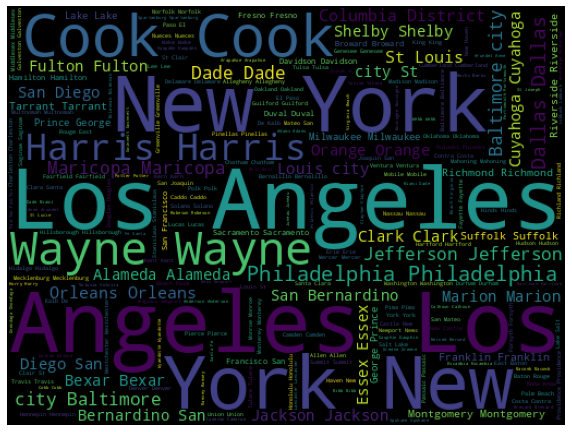

In [12]:
from wordcloud import WordCloud
from scipy import signal

cities = df['City']
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'black',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

cities = df['City'].value_counts().head(10)

fig = px.bar(x=cities.index,
            y=cities,
            text=(cities/len(df['City'])*100),
            title='Top 10 Cities With Most Homicide Cases',
            width=900)

fig.update_traces(textposition='outside',texttemplate='%{text:.2s}%', marker=dict(color=cities, colorscale='tealrose'))
fig.show()

In [13]:
df["State"].nunique()

51

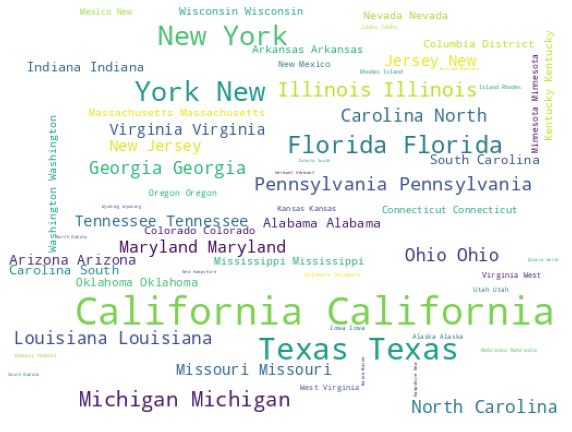

In [14]:
states = df['State']
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(states))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [16]:
victim_count = df['Victim_Count'].value_counts()

fig = px.pie(names=victim_count.index,
            values=victim_count,
            title='Homicide Victim Count',)

fig.update_traces(textinfo='percent',
            insidetextorientation='radial',
            legendgroup='show', 
            marker = dict(colors=px.colors.qualitative.Pastel))
fig.show()

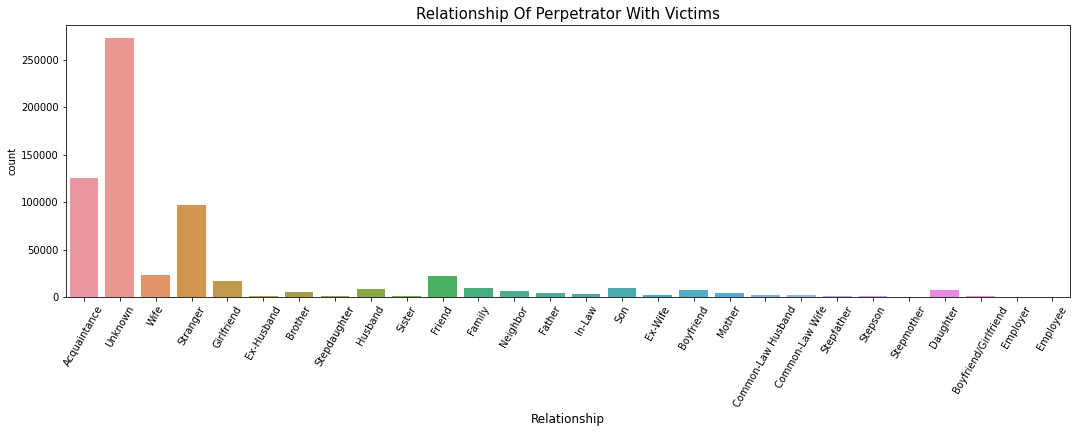

In [17]:
weapon_count = df.groupby('Weapon')['Victim_Count'].sum().reset_index().sort_values(by='Victim_Count', ascending=False)

fig = px.bar(x=weapon_count['Weapon'],
            y=weapon_count['Victim_Count'],
            text=weapon_count['Victim_Count'],
            title='Victim Count Of Weapons Used In Homicide')
fig.update_traces(textposition='outside', marker=dict(color=weapon_count['Victim_Count'], colorscale='rdylbu'))
fig.show()
crime_type = df['Crime_Type'].value_counts()

fig = px.pie(names=crime_type.index,
            values=crime_type,
            title='Crime Type')

fig.update_traces(textinfo='percent',
            insidetextorientation='radial',
            legendgroup='show', 
            marker = dict(colors=px.colors.qualitative.T10))
fig.show()
plt.figure(figsize=(18,5))
sns.countplot(x=df['Relationship'])
plt.xlabel('Relationship', fontsize=12)
plt.xticks(rotation=60)
plt.title('Relationship Of Perpetrator With Victims', fontsize=15)
plt.show()

perp_eth = df['Perpetrator_Ethnicity'].value_counts()

fig = px.pie(names=perp_eth.index,
            values=perp_eth,
            title='Perpetrator Ethnicity')

fig.update_traces(textinfo='percent',
            insidetextorientation='radial',
            legendgroup='show', 
            marker = dict(colors=px.colors.qualitative.Set1))
fig.show()
vic_eth = df['Victim_Ethnicity'].value_counts()

fig = px.pie(names=vic_eth.index,
            values=vic_eth,
            title='Victim Ethnicity')

fig.update_traces(textinfo='percent',
            insidetextorientation='radial',
            legendgroup='show', 
            marker = dict(colors=px.colors.qualitative.Set2))
fig.show()
prep_sex = df['Perpetrator_Sex'].value_counts()
vic_sex = df['Victim_Sex'].value_counts()

fig = px.pie(names=prep_sex.index,
            values=prep_sex,
            title="Perpetrator Sex")

fig.update_traces(textinfo='percent',
            insidetextorientation='radial',
            legendgroup='show', 
            marker = dict(colors=px.colors.qualitative.Set2))
fig.show()

fig = px.pie(names=vic_sex.index,
            values=vic_sex,
            title="Victim's Sex")

fig.update_traces(textinfo='percent',
            insidetextorientation='radial',
            legendgroup='show', 
            marker = dict(colors=px.colors.qualitative.Set2))

fig.show()
weapons = df.groupby('Perpetrator_Sex')['Weapon'].value_counts().reset_index(name='count')

fig = px.bar(x=weapons['Perpetrator_Sex'],
                  y=weapons['count'],
                  color=weapons['Weapon'],
                  barmode='stack',
                  text=weapons['count'],
                  height=600,
                  width=900)
fig.update_traces(textposition='outside')
fig.show()
record = df['Record_Source'].value_counts()

fig = px.bar(y=record.index,
            x=record,
            text=(record/len(df['Record_Source'])*100),
            title='Crime Record Sources',
            orientation='h',
            height=400,
            width=700)

fig.update_traces(textposition='outside',texttemplate='%{text:.3s}%', 
                 marker=dict(color=record, colorscale='fall'))
fig.show()

<AxesSubplot:>

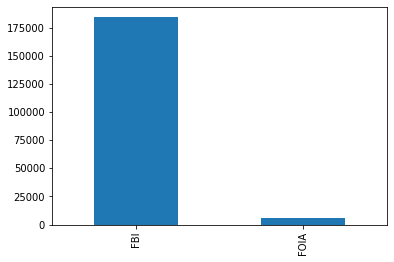

In [18]:
unsolved_crime = df[df['Crime_Solved']=='No']

unsolved_year = unsolved_crime['Year'].value_counts()

fig = px.bar(x=unsolved_year.index,
            y=unsolved_year,
            text=(unsolved_year/len(unsolved_crime['Year'])*100),
            title='Unsolved Crimes Over The Years')

fig.update_traces(textposition='outside',texttemplate='%{text:.3s}%', 
                 marker=dict(color=unsolved_year, colorscale='viridis'))
fig.show()
unsolved_crime['Record_Source'].value_counts().plot.bar()